# Health Project

## Whether a mammogram mass is benign or malignant?

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.


## I will :

Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). Apply:

* Decision tree
* Random forest
* KNN
* SVM
* Logistic Regression
* And, as a bonus challenge, a neural network using Keras.

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Remember some techniques such as SVM also require the input data to be normalized first.

Below I've set up an outline of a notebook for this project!

## First step: preparing the data

Start by importing the mammographic_masses.data.txt file into a Pandas dataframe and take a look at it. I should convert missing data (indicated by a ?) into NaN, and add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

In [81]:
import pandas as pd
masses_data = pd.read_csv('mammographic_masses.data.txt ',na_values=['?'],names=['BI_RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data.head()

,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


## Getting information from the data

The types of the data, number of missing values and...

In [5]:
masses_data.describe()

,BI_RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [6]:
masses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI_RADS     959 non-null float64
age         956 non-null float64
shape       930 non-null float64
margin      913 non-null float64
density     885 non-null float64
severity    961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


# Data Visualization
To underestand the relations between the data

### The number of mising values on bar chart

Since the number of missing values are not too many we can drop the related rows. There are quite a few missing values in the data set. Before I just drop every row that's missing data, I have to make sure that I don't bias the data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? If there were, I'd have to try and go back and fill that data in. Since the missing data seems randomly distributed, I go ahead and drop rows with missing data.

In [99]:
# import missingno as msno
# plt.figure(figsize=(5,5))
# msno.bar(masses_data.sample(960))
# msno.matrix(masses_data)
# # msno.dendrogram(masses_data)
# plt.show()

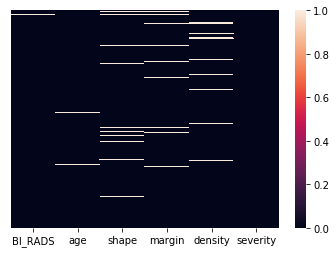

In [85]:
sns.heatmap(masses_data.isnull(),yticklabels=False)

In [7]:
masses_data.loc[(masses_data['age'].isnull())|(masses_data['shape'].isnull())|(masses_data['margin'].isnull())|
               (masses_data['density'].isnull())|(masses_data['severity'].isnull())]

,BI_RADS,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
9,5.0,60.0,NaN,5.0,1.0,1
12,4.0,64.0,1.0,NaN,3.0,0
19,4.0,40.0,1.0,NaN,NaN,0
20,NaN,66.0,NaN,NaN,1.0,1
22,4.0,43.0,1.0,NaN,NaN,0


In [145]:
x=masses_data.isnull().sum()
print(x)

BI_RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64


In [146]:
masses_data.dropna(inplace=True)
masses_data.describe()

,BI_RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [62]:
import copy
shape={1:'round',2:'oval',3:'lobular',4:'irregular'}
margin={1:'circumscribed', 2:'microlobulated', 3:'obscured', 4:'ill-defined', 5:'spiculated'}
density={1:'high', 2:'iso', 3:'low', 4 :'fat-containing'}
severity={0:'benign', 1:'malignant'}
masses_data1=masses_data.copy()
masses_data1['shape']=masses_data1['shape'].map(shape)
masses_data1['margin']=masses_data1['margin'].map(margin)
masses_data1['density']=masses_data1['density'].map(density)
masses_data1['severity']=masses_data1['severity'].map(severity)

masses_data1.head()


,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,lobular,spiculated,low,malignant
2,5.0,58.0,irregular,spiculated,low,malignant
3,4.0,28.0,round,circumscribed,low,benign
8,5.0,57.0,round,spiculated,low,malignant
10,5.0,76.0,round,ill-defined,low,malignant


In [47]:

trace1 = go.Scatter(
    y = masses_data.age,
    mode='markers',
    marker=dict(
        size=16,
        color = np.random.randn(830), #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]

py.iplot(data, filename='scatter-plot-with-colorscale')

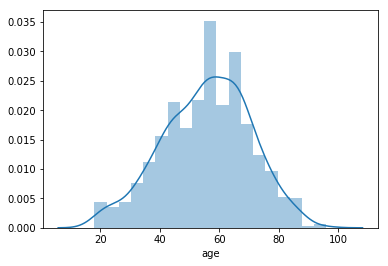

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(masses_data1.age)
plt.show()

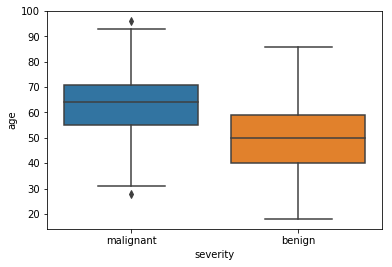

In [131]:
sns.boxplot(x='severity',y='age',data=masses_data1)

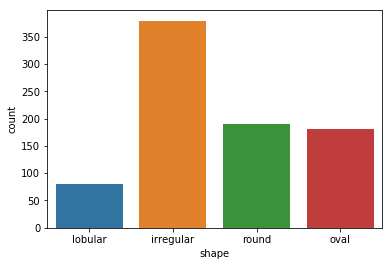

In [76]:
sns.countplot(x='shape',data=masses_data1)

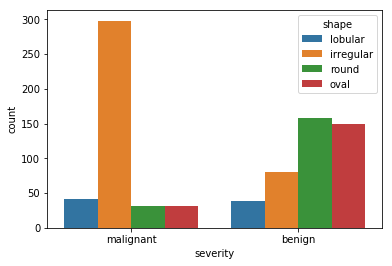

In [63]:
sns.countplot(x='severity',hue='shape',data=masses_data1)

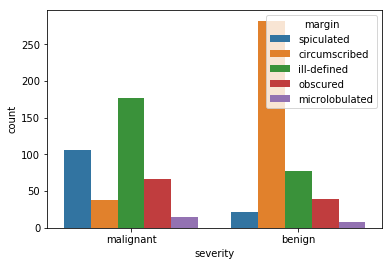

In [64]:
sns.countplot(x='severity',hue='margin',data=masses_data1)

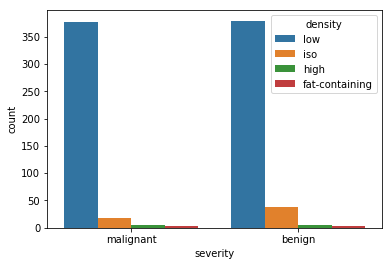

In [65]:
sns.countplot(x='severity',hue='density',data=masses_data1)

Here also I can check if there is outliers in data or not. (Something unusual!). There is no negative value or unlogical min, max or mean!

##### Some relations between data

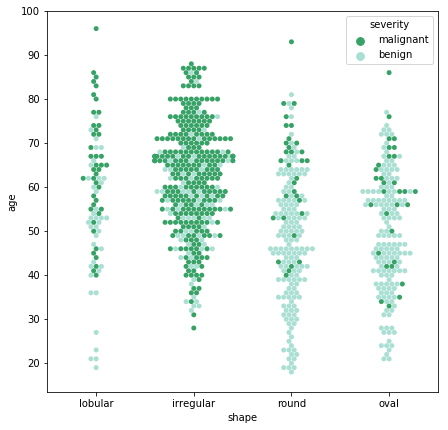

In [132]:
from pandas.io.formats.style import Styler

plt.figure(figsize=(7,7))
sns.swarmplot(x='shape',y='age',hue='severity',palette = "BuGn_r",data=masses_data1)
plt.show()

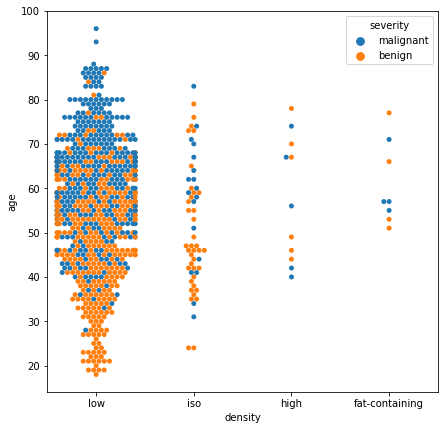

In [133]:
plt.figure(figsize=(7,7))
sns.swarmplot(x='density',y='age',hue='severity',data=masses_data1)
plt.show()

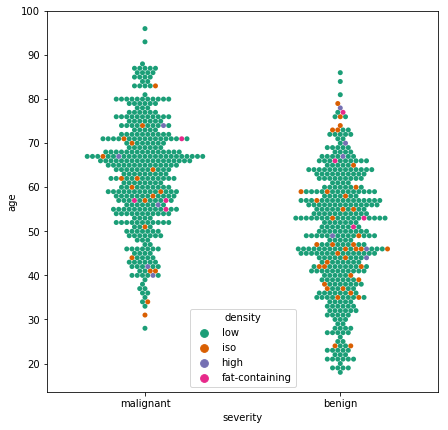

In [135]:
plt.figure(figsize=(7,7))
ax=sns.swarmplot(y='age',x='severity',hue='density',palette='Dark2',data=masses_data1)
plt.show()

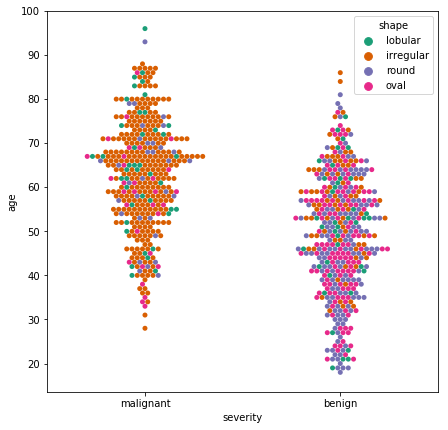

In [136]:
plt.figure(figsize=(7,7))
ax=sns.swarmplot(x='severity',y='age',hue='shape',palette='Dark2',data=masses_data1)
plt.show()

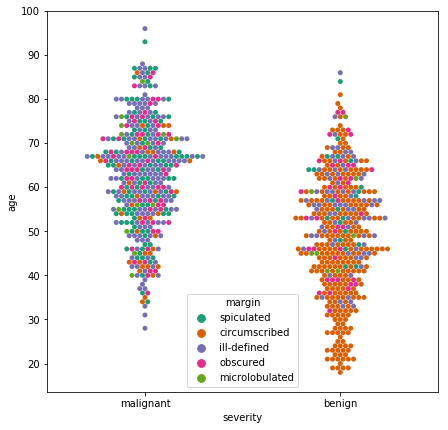

In [137]:
plt.figure(figsize=(7,7))
ax=sns.swarmplot(x='severity',y='age',hue='margin',palette='Dark2',data=masses_data1)
plt.show()

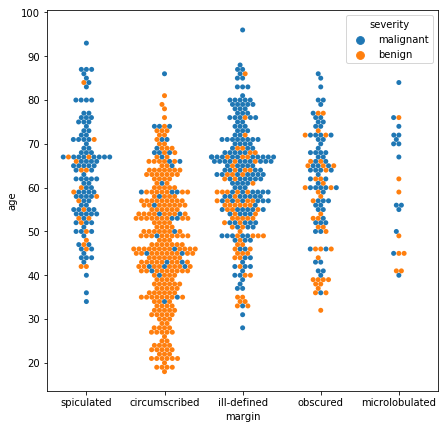

In [138]:
plt.figure(figsize=(7,7))
ax=sns.swarmplot(x='margin',y='age',hue='severity',data=masses_data1)
plt.show()

In [139]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

corelation=masses_data.corr()
data=[go.Heatmap(z = np.array(corelation.values),
                   x = np.array(corelation.columns),
                   y = np.array(corelation.columns),
                     colorscale='Blackbody',)
       ]


py.iplot(data)

In [48]:
shape1_Count=masses_data['shape'][(masses_data['severity']==1)].value_counts()
shape0_Count=masses_data['shape'][(masses_data['severity']==0)].value_counts()

# Create a bar plot//////////////////////////////
Benign=go.Bar(
    x = ['round',' oval',' lobular',' irregular'],
    y = shape0_Count.values
,name = 'benign',marker=dict(
        color='rgb(49,130,189)'
    ))
Malignant=go.Bar(
    x = ['round',' oval',' lobular',' irregular'],
    y = shape1_Count.values
,name = 'Malignant',marker=dict(
        color='rgb(204,204,204)',
    ))
data = [Benign,Malignant]
py.iplot(data)

Now I'll convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data I want to work with (age, shape, margin, and density) and another array that contains the classes (severity). I'll also need an array of the feature name labels.

In [148]:
features=masses_data[['age','shape','margin','density']]
classes = masses_data['severity']
feature_names = ['age', 'shape', 'margin', 'density']

Some of the models require the input data to be normalized, so let's go ahead and normalize the attribute data.

In [149]:
from sklearn import preprocessing

scaler=preprocessing.StandardScaler()
features_scaled=scaler.fit_transform(features)

Before moving to K-Fold cross validation and the models, start by creating a single train/test split of our data. Set aside 75% for training, and 25% for testing.

In [150]:
import numpy
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split

features_train,features_test,class_train,class_test=train_test_split(features_scaled,classes,train_size=0.75,random_state=1)

C:\Users\Farnoosh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



# Machine Learning

Now it's time to create models and fitting them to the training data. Measuring the accuracy of the resulting models using the test data.

In [166]:
import scipy.stats as ss
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import neighbors



MLA = []
Z = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,
    RandomForestClassifier()]
X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( features_train , class_train )
    pred = model.predict(features_test)
    MLA.append(accuracy_score(pred , class_test))


print(MLA)

[0.77403846153846156, 0.74038461538461542, 0.77884615384615385, 0.77403846153846156, 0.74519230769230771, 0.75]





Now instead of a single train/test split, I use K-Fold cross validation to get a better measure of the model's accuracy (K=10). 

In [26]:
dtc=DecisionTreeClassifier()
cv_score=cross_val_score(dtc,features_scaled,classes,cv=10)
print('DecisionTree_score:',cv_score.mean())

DecisionTree_score: 0.733784615815


In [27]:
rf=RandomForestClassifier(random_state=1)
cv_score=cross_val_score(rf,features_scaled,classes,cv=10)
print('RandomForest_score:',cv_score.mean())

RandomForest_score: 0.75404964807


And the other kernels of SVM :

In [28]:
for k in ['rbf','sigmoid','poly']:
    C=1.0
    svc=svm.SVC(kernel=k, C=C)
    cv_scores=cross_val_score(svc,features_scaled,classes,cv=10)
    print(k,cv_scores.mean())


rbf 0.801202370457
sigmoid 0.735105579111
poly 0.7927539426


### KNN

Choosing K is tricky, so I can't discard KNN until I've tried different values of K. Write a for loop to run KNN with K values ranging from 1 to 50 and see if K makes a substantial difference. Make a note of the best performance I could get out of KNN.

In [29]:
knn=neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores=cross_val_score(knn,features_scaled,classes,cv=10,scoring='accuracy')

print('KNN_Scores',cv_scores.mean())

KNN_Scores 0.785479548857


In [30]:
for k in range(1,51):
    knn=neighbors.KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn,features_scaled,classes,cv=10)
    if (cv_scores.mean()>=0.80):
        print('K=',k,cv_scores.mean())
print('There is no improvement!')

There is no improvement!


## Logistic Regression

I've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation
from sklearn.metrics import classification_report
from sklearn import metrics

lr=LogisticRegression()
cv_scores=cross_val_score(lr,features_scaled,classes,cv=10)
predicted = cross_validation.cross_val_predict(lr, features_scaled, classes, cv=10)
print('Logistic-regression',cv_scores.mean())
print('Accuracy_score:',metrics.accuracy_score(classes, predicted))


Logistic-regression 0.807358353274
Accuracy_score: 0.807228915663


In [120]:
print(metrics.classification_report(classes, predicted)) 

             precision    recall  f1-score   support

          0       0.84      0.77      0.80       427
          1       0.78      0.85      0.81       403

avg / total       0.81      0.81      0.81       830



In [162]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix(classes, predicted)

array([[328,  99],
       [ 61, 342]], dtype=int64)

In [163]:
accuracy_score(classes, predicted)

0.80722891566265065

In [165]:
m = LogisticRegression()
m.fit(features_train, class_train)

print(m.coef_)


[[ 0.8875425   0.79946004  0.6292204  -0.04447036]]


In [154]:
masses_data.head(0)

,BI_RADS,age,shape,margin,density,severity
